# Fake News Detection

## Importing required library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
import itertools
from sklearn.metrics import plot_confusion_matrix
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake["class"] = 0
df_true["class"] = 1

In [4]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging Fake news and true news

In [7]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [9]:
df = df.drop(["title", "subject","date"], axis = 1)

In [10]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Randomly shuffling the df

In [11]:
df = df.sample(frac = 1)

In [12]:
df

,text,class
9186,WASHINGTON (Reuters) - Key members of the U.S....,1
288,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
8727,Republicans have once again been made to look ...,0
14532,Performances like the one in the video below b...,0
15786,KUALA LUMPUR (Reuters) - One month into the tr...,1
...,...,...
18040,MOSCOW/ST PETERSBURG (Reuters) - Police detain...,1
3452,Nate Silver of fivethirtyeight.com is pretty a...,0
21167,Apparently these Germans are not interested in...,0
7582,President Zero F*cks Left Obama strikes agai...,0


## Check Duplicates

In [13]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

(38647, 2)

## Checking Missing values


In [14]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

## Reset the index

In [15]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [16]:
df

,text,class
0,WASHINGTON (Reuters) - Key members of the U.S....,1
1,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
2,Republicans have once again been made to look ...,0
3,Performances like the one in the video below b...,0
4,KUALA LUMPUR (Reuters) - One month into the tr...,1
...,...,...
38642,"If Republicans listen to this sage advice, Don...",0
38643,MOSCOW/ST PETERSBURG (Reuters) - Police detain...,1
38644,Nate Silver of fivethirtyeight.com is pretty a...,0
38645,President Zero F*cks Left Obama strikes agai...,0


## Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["text"] = df["text"].apply(wordopt)

In [19]:
df

,text,class
0,washington reuters key members of the u s ...,1
1,washington reuters u s senate republicans...,1
2,republicans have once again been made to look ...,0
3,performances like the one in the video below b...,0
4,kuala lumpur reuters one month into the tr...,1
...,...,...
38642,if republicans listen to this sage advice don...,0
38643,moscow st petersburg reuters police detain...,1
38644,nate silver of fivethirtyeight com is pretty a...,0
38645,president zero f cks left obama strikes agai...,0


## Remove Stop words and stemming

In [20]:
ps = PorterStemmer()

In [21]:
def stemming_and_stopwords(text):
    
    # Remove stopwords and tokenization
    clean_words = [word for word in text.split() if word not in stopwords.words('english')]
    
    # Stemming
    for i in range(len(clean_words)):
        clean_words[i] = ps.stem(clean_words[i])

    return clean_words

### Defining dependent and independent variable as x and y

In [22]:
x = df["text"]
y = df["class"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
print(x_train.shape)
print(y_train.shape)

(28985,)
(28985,)


In [25]:
print(x_test.shape)
print(y_test.shape)

(9662,)
(9662,)


## Converting text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer(analyzer=stemming_and_stopwords)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [28]:
print(type(xv_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [29]:
print(xv_test.shape)

(9662, 69478)


In [30]:
xv_test[0]

<1x69478 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

## Confusion Matrix


In [31]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP

In [32]:
def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f1_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  2*p*r/(p+r)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
accuracy = m.accuracy_score(y_test, pred_lr)
accuracy

0.9834402815152142

In [37]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_lr)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4210
False Positive  99
False Negative  61
True Positive  5292


In [38]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9834402815152142
PRECISION  :  0.9816360601001669
RECALL     :  0.9886045208294414
F1_SCORE :  0.9851079672375278


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_lr)

array([[4210,   99],
       [  61, 5292]], dtype=int64)

In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4309
           1       0.98      0.99      0.99      5353

    accuracy                           0.98      9662
   macro avg       0.98      0.98      0.98      9662
weighted avg       0.98      0.98      0.98      9662



## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [43]:
pred_NB = NB.predict(xv_test)

In [44]:
accuracy = m.accuracy_score(y_test, pred_NB)
accuracy

0.9295176981991307

In [45]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_NB)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  3863
False Positive  446
False Negative  235
True Positive  5118


In [46]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9295176981991307
PRECISION  :  0.9198418404025881
RECALL     :  0.956099383523258
F1_SCORE :  0.9376202253366309


In [47]:
print(classification_report(y_test, pred_NB))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4309
           1       0.92      0.96      0.94      5353

    accuracy                           0.93      9662
   macro avg       0.93      0.93      0.93      9662
weighted avg       0.93      0.93      0.93      9662



## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
pred_gbc = GBC.predict(xv_test)

In [51]:
accuracy = m.accuracy_score(y_test, pred_gbc)
accuracy

0.9949285862140343

In [52]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_gbc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4268
False Positive  41
False Negative  8
True Positive  5345


In [53]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9949285862140343
PRECISION  :  0.9923876717415522
RECALL     :  0.9985055109284513
F1_SCORE :  0.9954371915448366


In [54]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4309
           1       0.99      1.00      1.00      5353

    accuracy                           0.99      9662
   macro avg       1.00      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662



## KNN


In [55]:
from sklearn.neighbors import KNeighborsClassifier

### Finding K value

In [64]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xv_train, y_train) 
    accuracy_rate.append(m.accuracy_score(y_test, knn.predict(xv_test)))

Text(0, 0.5, 'Acuuracy Rate')

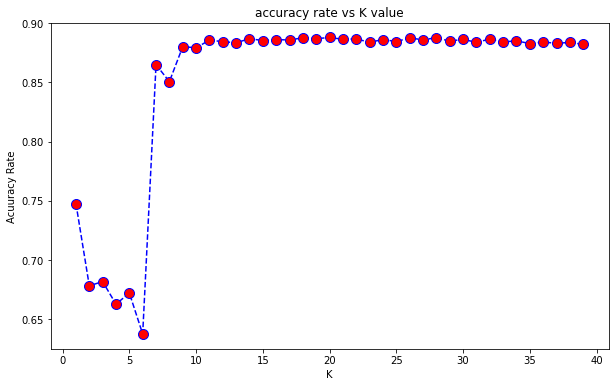

In [65]:
 plt.figure(figsize=(10,6))
 plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
 plt.title('accuracy rate vs K value')
 plt.xlabel('K')
 plt.ylabel('Acuuracy Rate')

### Since accuracy of knn is stable after n = 11 so, we will take n = 11

In [56]:
 knn = KNeighborsClassifier(n_neighbors=11)
 knn.fit(xv_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [57]:
pred_knn = knn.predict(xv_test)

In [58]:
accuracy = m.accuracy_score(y_test, pred_knn)
accuracy

0.8835644794038502

In [59]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  3745
False Positive  564
False Negative  561
True Positive  4792


In [60]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.8835644794038502
PRECISION  :  0.8946975354742345
RECALL     :  0.8951989538576499
F1_SCORE :  0.89494817443272


In [61]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4309
           1       0.89      0.90      0.89      5353

    accuracy                           0.88      9662
   macro avg       0.88      0.88      0.88      9662
weighted avg       0.88      0.88      0.88      9662



### Hyperparameter Tuning - Grid Search on KNN

In [62]:
n_neighbors = list(range(1,40))
p=[1,2]

hyperparameters = dict(n_neighbors=n_neighbors, p=p)

In [63]:
knn_2 = KNeighborsClassifier()

In [64]:
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(xv_train, y_train)

In [ ]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'best_model' is not defined

In [ ]:
pred_knn2 = best_model.predict(xv_test)
accuracy = m.accuracy_score(y_test, pred_knn2)
accuracy

In [ ]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn2)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

In [ ]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

In [ ]:
print(classification_report(y_test, pred_knn2))

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
accuracy = m.accuracy_score(y_test, pred_rfc)
accuracy

0.9870627199337612

In [ ]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_rfc)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

True Negative  4220
False Positive  93
False Negative  32
True Positive  5317


In [ ]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

ACCURACY   :  0.9870627199337612
PRECISION  :  0.9828096118299445
RECALL     :  0.9940175733782015
F1_SCORE :  0.9883818198717353


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4313
           1       0.98      0.99      0.99      5349

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662

